<a href="https://colab.research.google.com/github/hemander1433/NETFLIX-DATA-ANALYSIS/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt # creating graphs
import pandas as pd # database manipulation and processing
import numpy as np # mathematical operations
import seaborn as sns # creating graphs

sns.set_theme(style="darkgrid", palette='Set2') # applying style and color palette

In [ ]:
DF_NETFLIX = '/content/netflix_movies (1).csv'

df_netflix = pd.read_csv(DF_NETFLIX)
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_netflix.nunique()

,0
show_id,8807
type,2
title,8804
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
df_netflix.head()      ## print the first five rows of info

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
starting_year = df_netflix["release_year"].min()   ### minimum year value

# get the last index of the column
final_year = df_netflix["release_year"].max()       ### max year value...

print(f"This dataset covers movies released from {starting_year} to {final_year}.")

This dataset covers movies released from 1925 to 2021.


In [ ]:
release_year = df_netflix["release_year"].value_counts().reset_index()
release_year.head()     # number of movues released in that yearr..

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


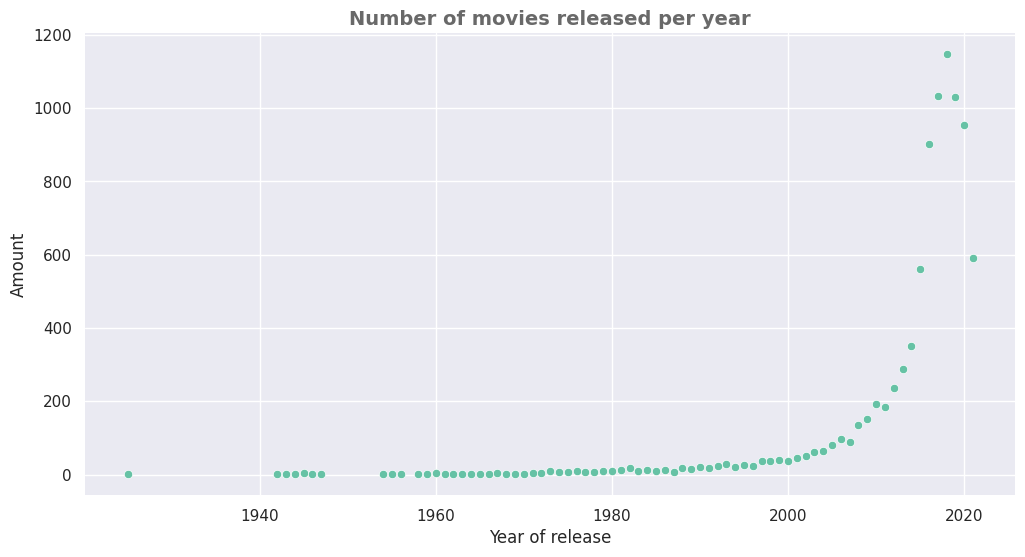

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(x=release_year["release_year"], y=release_year["count"])
for spines in ax.spines.values(): # removing the spines, the chart frame
        spines.set_visible(False)

plt.xlabel("Year of release")
plt.ylabel("Amount")

plt.title("Number of movies released per year", fontsize=14, weight='bold', color="dimgray");

In [ ]:
movies_and_tv_prog = df_netflix["type"].value_counts().reset_index()
movies_and_tv_prog

,type,count
0,Movie,6131
1,TV Show,2676


In [ ]:
movie_counts = movies_and_tv_prog["count"][0]
tv_show_counts = movies_and_tv_prog["count"][1]

print(f"Number of movies: {movie_counts}\nNumber of TV Show: {tv_show_counts}")

Number of movies: 6131
Number of TV Show: 2676


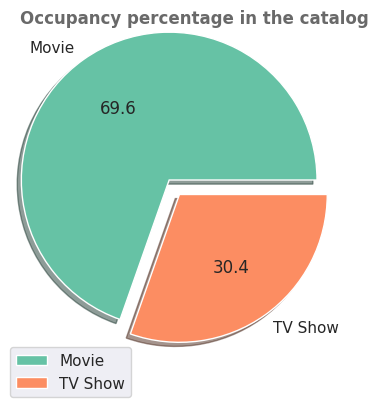

In [ ]:
plt.pie([movie_counts, tv_show_counts], labels=["Movie", "TV Show"], shadow=True, explode=[0.30,-0.18], autopct="%.1f")

plt.title("Occupancy percentage in the catalog", fontsize=12, weight='bold', color='dimgrey')

plt.legend(loc="lower left", bbox_to_anchor=(-0.02,-0.01))

plt.show()

In [ ]:
# taking the duration of the movies, removing the word min from the cell and transforming the type into numeric
movies_duration = df_netflix.loc[df_netflix["type"] == "Movie"]["duration"].str.replace("min", '').astype("float").reset_index(drop=True)
movies_duration.head()

,duration
0,90.0
1,91.0
2,125.0
3,104.0
4,127.0


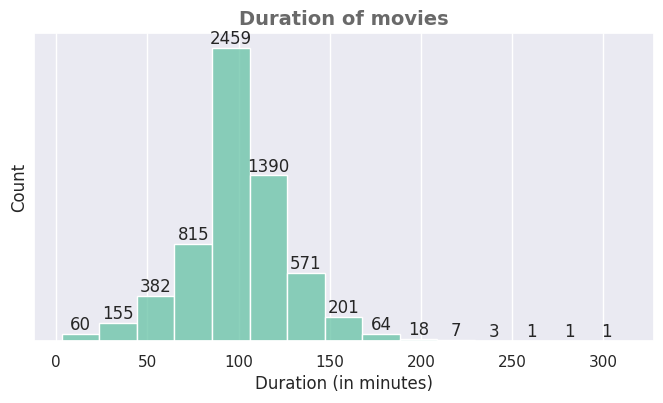

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8,4))      ## fig represents whole area , ax represents subplots

h = sns.histplot(movies_duration, bins=15)
for i in h.containers:
    ax.bar_label(ax.containers[0])

plt.ylabel('Count')
plt.xlabel('Duration (in minutes)')

plt.yticks([])

plt.grid(True)

plt.title('Duration of movies', fontsize=14, weight='bold', color='dimgrey');

In [ ]:
# finding the 10 most popular directors
director_movies = df_netflix['director'].value_counts()[:10].reset_index()
director_movies.head()

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14


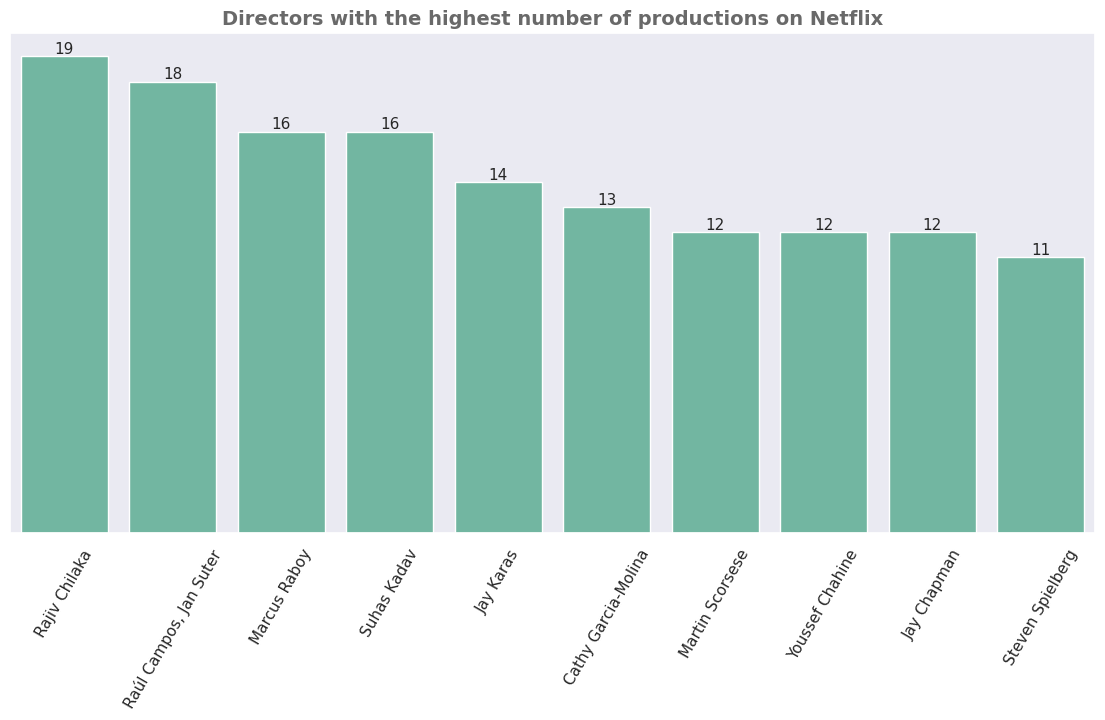

In [ ]:
color_palette = sns.color_palette()
fig, ax = plt.subplots(figsize=(14,6.5))

b = sns.barplot(data=director_movies, x='director', y='count', color=color_palette[0])
for barra in b.containers:            ## barra bar in the container..
    ax.bar_label(ax.containers[0], fontsize=11)    ### including the values ​​of each bar referring to the title
    b.set_ylabel('')

plt.yticks([])
plt.xlabel('')

plt.tick_params(axis='x', rotation=60)

plt.title('Directors with the highest number of productions on Netflix', weight='bold', fontsize=14, color='dimgrey');

In [ ]:

# separating the title and duration of the movies

longer_running_movies = df_netflix.loc[df_netflix['type'] == 'Movie'][['title', 'duration']]

# removing the word 'min' from the string and transforming the duration column into float type
longer_running_movies['duration'] = longer_running_movies['duration'].str.replace('min', '').astype('float')

# taking the title of the movies and breaking all spaces into two lines
longer_running_movies['title'] = [title.replace(' ', '\n') for title in longer_running_movies['title']]

# sorting the dataframe by duration and restarting the index
longer_running_movies = longer_running_movies.sort_values('duration', ascending=False).reset_index(drop=True)[:10]

longer_running_movies.head()

,title,duration
0,Black\nMirror:\nBandersnatch,312.0
1,Headspace:\nUnwind\nYour\nMind,273.0
2,The\nSchool\nof\nMischief,253.0
3,No\nLonger\nkids,237.0
4,Lock\nYour\nGirls\nIn,233.0


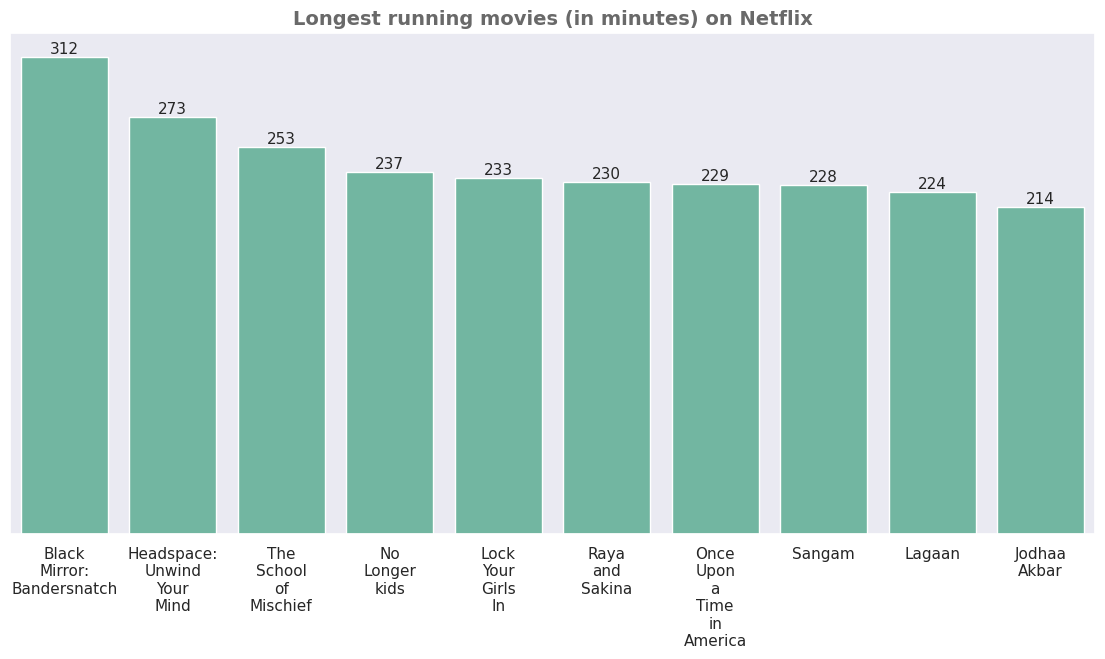

In [ ]:
# viewing the 10 longest running movies on Netflix
fig, ax = plt.subplots(figsize=(14, 6.5))

b = sns.barplot(data=longer_running_movies, x='title', y='duration', color=color_palette[0])
for i in b.containers:
    ax.bar_label(ax.containers[0], fontsize=11)
    b.set_ylabel('')
    b.set_xlabel('')

plt.yticks([])

plt.title('Longest running movies (in minutes) on Netflix', fontsize=14, weight='bold', color='dimgrey');

In [ ]:
launchy_country = df_netflix['country'].value_counts().reset_index()[:10]
launchy_country.head()

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


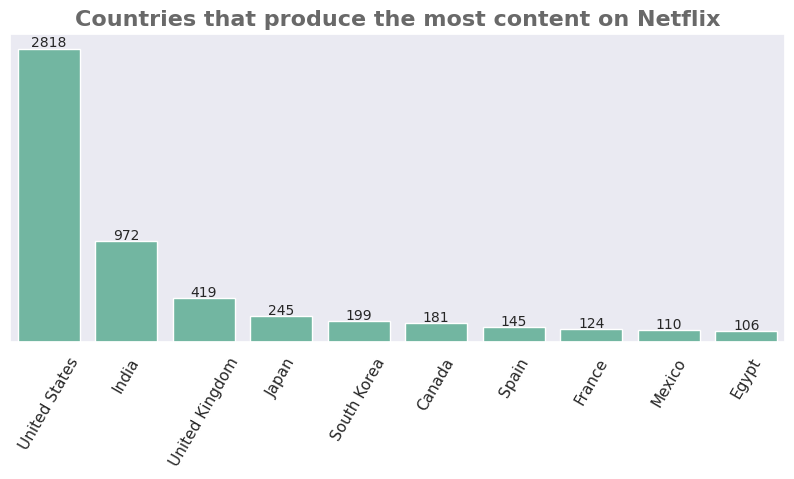

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

b = sns.barplot(data=launchy_country, x='country', y='count', color=color_palette[0])

for i in b.containers:
    ax.bar_label(ax.containers[0], padding=-1, fontsize=10)
    b.set_xlabel('')
    b.set_ylabel('')

plt.yticks([])
plt.tick_params(axis='x', rotation=60)

plt.title('Countries that produce the most content on Netflix', fontsize=16, weight='bold', color='dimgrey');